In [1]:
from tensorflow.keras.models import load_model


In [7]:
import cv2


In [13]:
import random

In [19]:
from sklearn.preprocessing import LabelBinarizer


In [22]:
import numpy as np

In [30]:
from tensorflow.keras.models import Sequential


In [41]:
import matplotlib.pyplot as plt

In [50]:
import imutils


In [48]:
pip install imutils


In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout


## Offline handwriting recognition involves the automatic conversion of text in an image into letter codes that are usable within computer and text-processing applications. In simple terms, it is the text extraction from your handwritten notebooks/pages. Why called offline? The point being that there is an online text recognition system, which is referred for text that is digitally generated by using tools like stylus, apple pencil, etc.



# Approach
## Step1 : Build a digit(0-9) + A-Z characters classifier using a CNN architecture.
## Step2 : Apply character segmentation for the handwritten word image.
## Step3 : Classify each segmented letter and then get the final word in the image.

In [2]:
!pip install imutils


In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [3]:
import zipfile
import os

def unzip_folder(zip_path, extract_to):
    # Ensure the output directory exists
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all the contents into the directory
        zip_ref.extractall(extract_to)
        print(f"Extracted {zip_path} to {extract_to}")

# Usage example
zip_file_path = 'C:\\Users\\himan\\Downloads\\archive (38).zip'
output_directory = 'C:\\Users\\himan\\Downloads\\'
unzip_folder(zip_file_path, output_directory)


Extracted C:\Users\himan\Downloads\archive (38).zip to C:\Users\himan\Downloads\


In [5]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [8]:
dir = "C:\\Users\\himan\\Downloads\\Train\\"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [9]:
len(train_data)


140000

In [10]:
val_dir = "C:\\Users\\himan\\Downloads\\Validation\\"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])


In [11]:
len(val_data)


15209

In [14]:
random.shuffle(train_data)
random.shuffle(val_data)

In [15]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [16]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [20]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [23]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [24]:
train_X.shape

(140000, 32, 32, 1)

In [25]:
train_Y.shape

(140000, 35)

In [26]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [27]:
val_X.shape

(15209, 32, 32, 1)

In [28]:
val_Y.shape

(15209, 35)

In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,851 (636.14 KB)

 Trainable params: 162,851 (636.14 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


In [38]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 67s 15ms/step - accuracy: 0.7241 - loss: 0.9160 - val_accuracy: 0.8344 - val_loss: 0.7178
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 69s 16ms/step - accuracy: 0.8925 - loss: 0.3027 - val_accuracy: 0.8571 - val_loss: 0.6291
Epoch 3/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.9060 - loss: 0.2577 - val_accuracy: 0.8521 - val_loss: 0.6220
Epoch 4/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - accuracy: 0.9127 - loss: 0.2329 - val_accuracy: 0.8703 - val_loss: 0.6667
Epoch 5/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 71s 16ms/step - accuracy: 0.9181 - loss: 0.2190 - val_accuracy: 0.8792 - val_loss: 0.6157
Epoch 6/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 73s 17ms/step - accuracy: 0.9218 - loss: 0.2065 - val_accuracy: 0.8803 - val_loss: 0.6652
Epoch 7/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 74s 17ms/step - accuracy: 0.9244 - loss: 0.2007 - val_accuracy: 0.8726 - val_loss: 0.6593
Epoch 8/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 75s 17ms/step - accuracy: 0.9275 -

In [39]:
model.save('handwritten.h5')


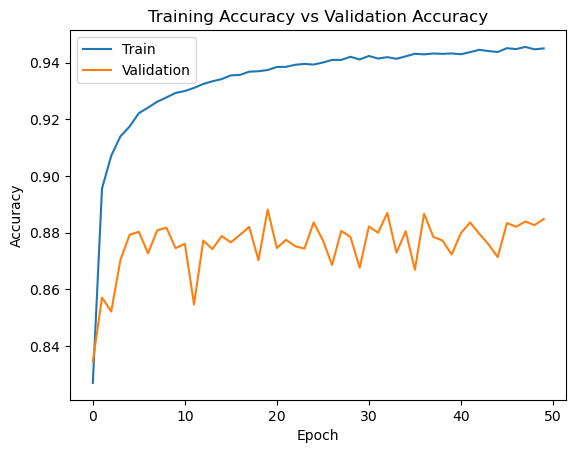

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

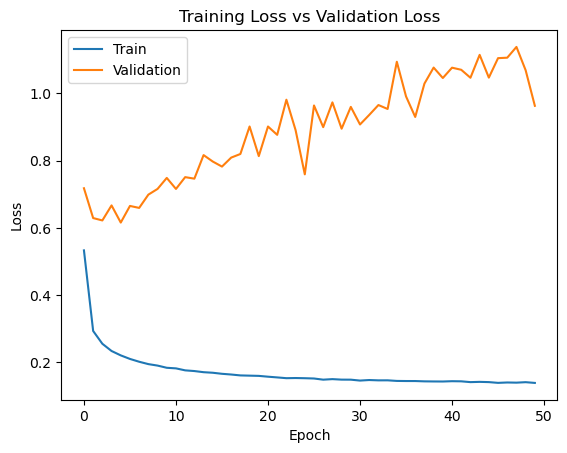

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Recognition and Post-Processing
The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
The get letters function fetches the list of letters and get word function gets the individual word.

In [44]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [45]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [46]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
BEVES


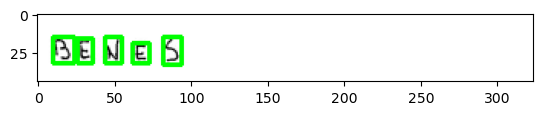

In [51]:
letter,image = get_letters("TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

## Drawbacks¶
### The recognition part is dependent on the contour detection code, so if the opencv library is not able to find the character contour, then this method will fail.
### There could be a lot of variation in a single handwritten letter in terms of writing style, therefore a lot more examples are needed for training this model.
### This model will not work for connected texts like a cursive handwritten word